# Clase 5, usando datos de acciones

Vamos a aprender a descargar datos historicos dela bolsa de valores y aplicar los conceptos que hemos visto

- Leer archivos CSV
- Descargar datos historicos
- Obtener estadísticos básicos

## Descargar datos de manera remota

En esta clase estaremos usando yahoo para descargar datos

In [1]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


## Obtener datos diarios, tesla y apple

In [20]:
# Ejemplo yahoo
# https://finance.yahoo.com
df = yf.download(["AAPL", "AMZN"], start="2017-01-01", end="2024-04-30")["Close"]
df.head()

[*********************100%%**********************]  2 of 2 completed


Ticker,AAPL,AMZN
Date,,
2017-01-03,29.037500,37.683498
2017-01-04,29.004999,37.859001
2017-01-05,29.152500,39.022499
2017-01-06,29.477501,39.799500
2017-01-09,29.747499,39.846001


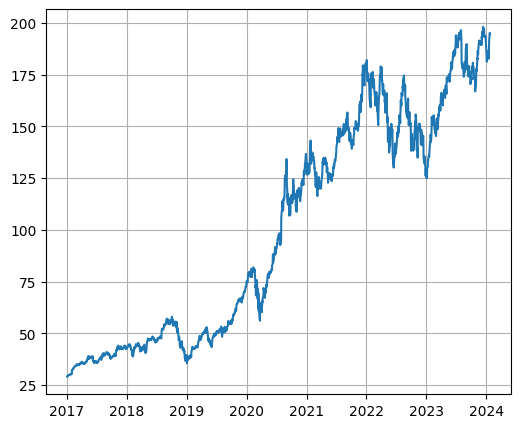

In [21]:
# Gráficamos los precios de cierre
plt.figure(figsize=(6,5))
plt.plot(df["AAPL"])
plt.grid()

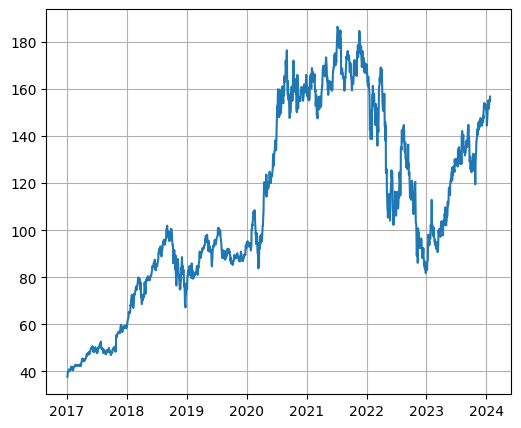

In [22]:
plt.figure(figsize=(6,5))
plt.plot(df["AMZN"])
plt.grid()

In [23]:
# Ejemplo con acciónes de la bolsa mexicana, siempre usamos .MX
# Bajamos la acción de Banorte y Wal-Mart de México,
df = yf.download(["GFNORTEO.MX", "WALMEX.MX"], start="2017-01-01", end="2024-04-30")["Close"]
df.head()

[*********************100%%**********************]  2 of 2 completed


Ticker,GFNORTEO.MX,WALMEX.MX
Date,,
2017-01-02,102.300003,37.049999
2017-01-03,101.220001,37.680000
2017-01-04,99.949997,37.750000
2017-01-05,100.139999,37.410000
2017-01-06,97.389999,36.529999


### Grafique las acciones de Mexico

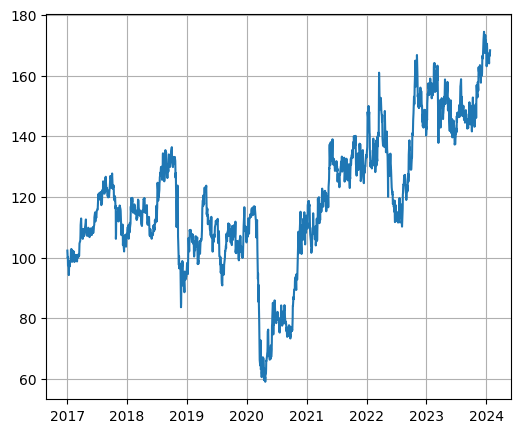

In [24]:
plt.figure(figsize=(6,5))
plt.plot(df["GFNORTEO.MX"])
plt.grid()

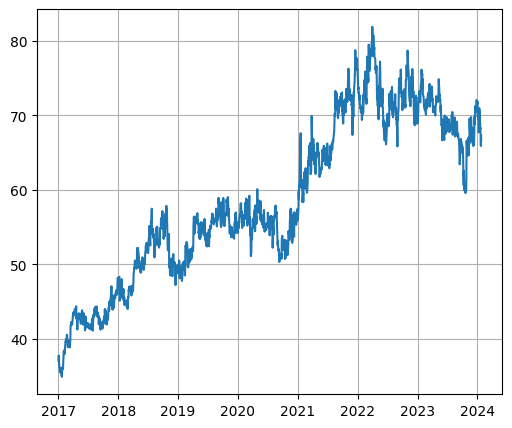

In [25]:
plt.figure(figsize=(6,5))
plt.plot(df["WALMEX.MX"])
plt.grid()

Vamos a sacar el rendimiento, en este caso es diario

$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$


In [27]:
# Aplicamos la funcion .shift
df.shift().head()

Ticker,GFNORTEO.MX,WALMEX.MX
Date,,
2017-01-02,NaN,NaN
2017-01-03,102.300003,37.049999
2017-01-04,101.220001,37.680000
2017-01-05,99.949997,37.750000
2017-01-06,100.139999,37.410000


In [31]:
(df - df.shift())/df.shift()

Ticker,GFNORTEO.MX,WALMEX.MX
Date,,
2017-01-02,NaN,NaN
2017-01-03,-0.010557,0.017004
2017-01-04,-0.012547,0.001858
2017-01-05,0.001901,-0.009007
2017-01-06,-0.027462,-0.023523
...,...,...
2024-01-18,-0.006242,-0.007275
2024-01-19,0.020550,0.001905
2024-01-22,-0.005198,-0.035986


In [32]:
rt = df.pct_change()
rt.head()

Ticker,GFNORTEO.MX,WALMEX.MX
Date,,
2017-01-02,NaN,NaN
2017-01-03,-0.010557,0.017004
2017-01-04,-0.012547,0.001858
2017-01-05,0.001901,-0.009007
2017-01-06,-0.027462,-0.023523


In [34]:
# Eliminamos los NA (que es el primer dia)
rt = rt.dropna()
rt.head()

Ticker,GFNORTEO.MX,WALMEX.MX
Date,,
2017-01-03,-0.010557,0.017004
2017-01-04,-0.012547,0.001858
2017-01-05,0.001901,-0.009007
2017-01-06,-0.027462,-0.023523
2017-01-09,-0.005955,-0.017520


In [35]:
# Observamos nuestro nuevo data frame
rt["WALMEX.MX"].describe()

count    1776.000000
mean        0.000457
std         0.015864
min        -0.083225
25%        -0.009134
50%         0.000372
75%         0.009835
max         0.068265
Name: WALMEX.MX, dtype: float64

<Axes: >

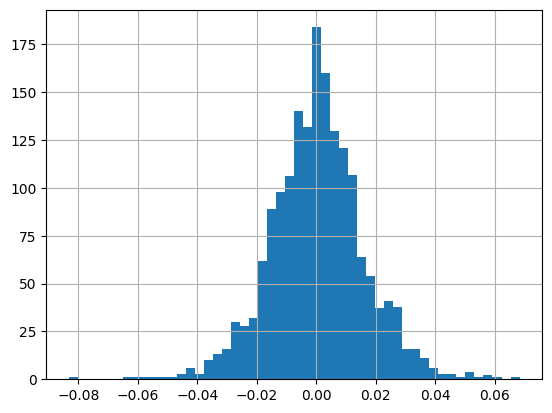

In [37]:
# Histograma de los rendimientos
rt["WALMEX.MX"].hist(bins=50)

### Banorte

- Rendimiento aritmético
- Rendimiento geométrico
- Comprobar que rendimiento geométrico cuadre con aritético
- Rendimiento usando precio final y precio inicial


Recordando que los rendimientos son:


$r_a = (\prod_{i=1}^{T}(1+r_i)) - 1$

$\bar{r}_g=\left[\prod_{i=1}^{T}(1+r_i)\right]^{1/T}-1.$

Crea una función para calcular los mismos

In [38]:
# Aritmético
primero_banorte = df["GFNORTEO.MX"].iloc[0]
ultimo_banorte = df["GFNORTEO.MX"].iloc[-1]

(ultimo_banorte - primero_banorte)/primero_banorte

0.6452589690876035

In [40]:
(1 + rt["GFNORTEO.MX"]).prod()

1.6452589690876005

In [41]:
def rendimiento_aritmetico(x):
    return (1+x).prod() - 1

In [42]:
rendimiento_aritmetico(rt["GFNORTEO.MX"])

0.6452589690876005

In [43]:
# Geometrico
rg = (1 + rt["GFNORTEO.MX"]).prod() ** (1/len(rt)) - 1
rg

0.0002803871614063258

In [45]:
# Comprobar que cuadre
(1+rg)**(len(rt)) - 1

0.645258969087771

In [46]:
primero_banorte * (1+rg)**(len(rt))

168.3099975586109

In [47]:
ultimo_banorte

168.30999755859375

Recordando, con el rendimiento geometrico puedo obteener esto:

$$S_t = S_0 * (1 + rg) ^T$$

¿como se vería la gráfica de Banorte partiendo del rendimiento geometrico hasta el día de hoy?

In [48]:
precios = [primero_banorte]
for i in range(len(rt)):
    precios.append(primero_banorte * (1+rg)**i)

In [49]:
df["geometrico_banorte"] = precios

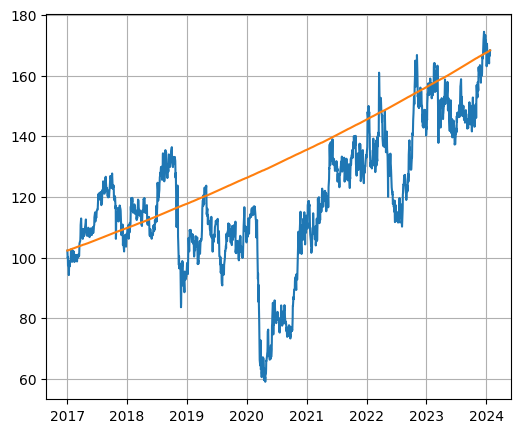

In [52]:
plt.figure(figsize=(6,5))
plt.plot(df["GFNORTEO.MX"])
plt.plot(df["geometrico_banorte"])
plt.grid()

###  Walmex

- Rendimiento aritmético
- Rendimiento geométrico
- Comprobar que rendimiento geométrico cuadre con aritmético
- Rendimiento usando precio final y precio inicial

In [53]:
# Aritmético
rendimiento_aritmetico(rt["WALMEX.MX"])

0.8016194702976149

In [57]:
# Geometrico
rg_walmex = (1 + rt["WALMEX.MX"]).prod() ** (1/len(rt)) - 1
rg_walmex

0.00033152226463517565

$$Inicial * (1+geometrico)^n  = Final$$

In [60]:
# Comprobar rendimiento queométrico
primero_walmex = df["WALMEX.MX"].iloc[0]
ultimo_walmex = df["WALMEX.MX"].iloc[-1]

ultimo_walmex, primero_walmex * (1+rg_walmex)**(len(rt))

(66.75, 66.75000000001056)

In [ ]:
# Rendimiento usando precio final y precio inicial


In [ ]:
# Grafique la acción con el rendimiento geometrico


In [65]:
precios = [primero_walmex]
for i in range(len(rt)):
    precios.append(primero_walmex * (1+rg_walmex)**i)

In [66]:
df["geometrico_walmex"] = precios

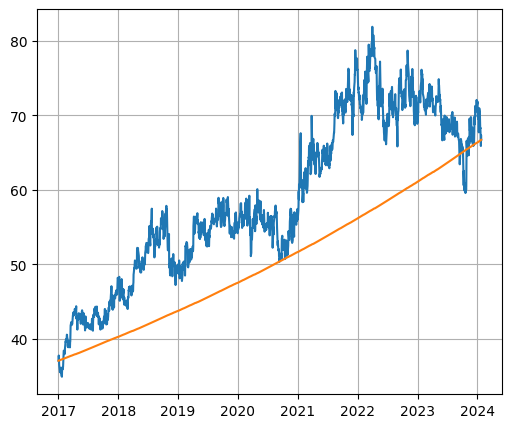

In [67]:
plt.figure(figsize=(6,5))
plt.plot(df["WALMEX.MX"])
plt.plot(df["geometrico_walmex"])
plt.grid()

### Riesgo y rendimiento, concepto

Calcule el riesgo y volatilidad para estos tickes:

['AAPL', 'AMZN', 'GOOGL', 'COST', 'MSFT']



¿Hay alguna relación entre el riesgo y el rendimiento? Justifique su respuesta

In [68]:
df = yf.download(["AAPL", "AMZN", "GOOGL", "COST", "MSFT"], start="2017-01-01", end="2024-04-30")["Close"]
df.head()

[*********************100%%**********************]  5 of 5 completed


Ticker,AAPL,AMZN,COST,GOOGL,MSFT
Date,,,,,
2017-01-03,29.037500,37.683498,159.729996,40.400501,62.580002
2017-01-04,29.004999,37.859001,159.759995,40.388500,62.299999
2017-01-05,29.152500,39.022499,162.910004,40.651001,62.299999
2017-01-06,29.477501,39.799500,162.830002,41.260502,62.840000
2017-01-09,29.747499,39.846001,160.970001,41.359001,62.639999


In [69]:
rt = df.pct_change().dropna()

<Axes: xlabel='Date'>

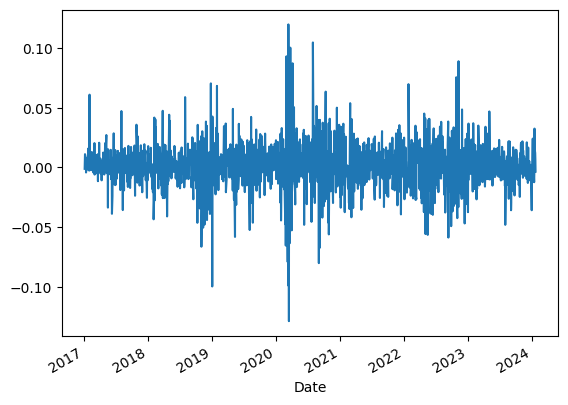

In [70]:
rt.AAPL.plot()

In [72]:
rt.mean() * 252

Ticker
AAPL     0.315286
AMZN     0.258892
COST     0.233336
GOOGL    0.228328
MSFT     0.304623
dtype: float64

In [73]:
rt.var() * 252

Ticker
AAPL     0.090275
AMZN     0.112905
COST     0.052347
GOOGL    0.086427
MSFT     0.080477
dtype: float64

In [74]:
rt.std() * 252**(1/2)

Ticker
AAPL     0.300458
AMZN     0.336013
COST     0.228795
GOOGL    0.293985
MSFT     0.283684
dtype: float64

Ojo, para convertir a base anual

$$E[r_a]=12E[r_m]=252E[r_d]=52E[r_w],\text{ y}$$

$$\sigma_{r_a}=\sqrt{12}\sigma_{r_m}=\sqrt{252}\sigma_{r_d}=\sqrt{52}\sigma_{r_w}$$

### Mostrar regresión

In [80]:
tickers = ['AAPL', 'AMZN', 'GOOGL', 'COST', 'MSFT', 'TSLA', 'BRK-A', 'NVDA']

df = yf.download(tickers, start="2017-01-01", end="2024-04-30")["Close"]
df.head()

[*********************100%%**********************]  8 of 8 completed


Ticker,AAPL,AMZN,BRK-A,COST,GOOGL,MSFT,NVDA,TSLA
Date,,,,,,,,
2017-01-03,29.037500,37.683498,245850.0,159.729996,40.400501,62.580002,25.502501,14.466000
2017-01-04,29.004999,37.859001,246600.0,159.759995,40.388500,62.299999,26.097500,15.132667
2017-01-05,29.152500,39.022499,244852.0,162.910004,40.651001,62.299999,25.434999,15.116667
2017-01-06,29.477501,39.799500,245394.0,162.830002,41.260502,62.840000,25.775000,15.267333
2017-01-09,29.747499,39.846001,243111.0,160.970001,41.359001,62.639999,26.820000,15.418667


In [81]:
rt = df.pct_change().dropna()

In [83]:
df = pd.DataFrame({
    "rendimientos": rt.mean() * 252,
    "volatilidades": rt.std() * 252**(1/2)
})

df

,rendimientos,volatilidades
Ticker,,
AAPL,0.315286,0.300458
AMZN,0.258892,0.336013
BRK-A,0.139898,0.201143
COST,0.233336,0.228795
GOOGL,0.228328,0.293985
MSFT,0.304623,0.283684
NVDA,0.575769,0.498294
TSLA,0.560139,0.603346


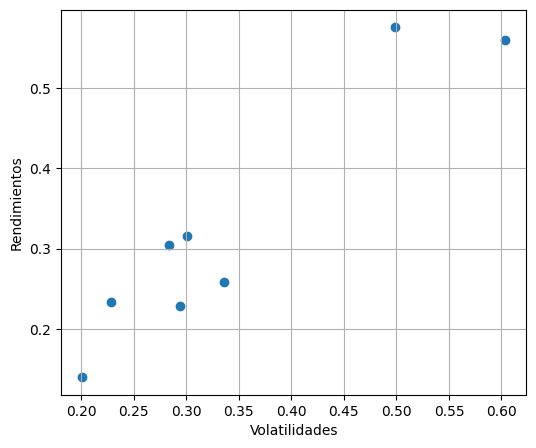

In [86]:
plt.figure(figsize=(6,5))
plt.scatter(df["volatilidades"], df["rendimientos"])
plt.xlabel("Volatilidades")
plt.ylabel("Rendimientos")
plt.grid()

Text(0, 0.5, '$E[r]$')

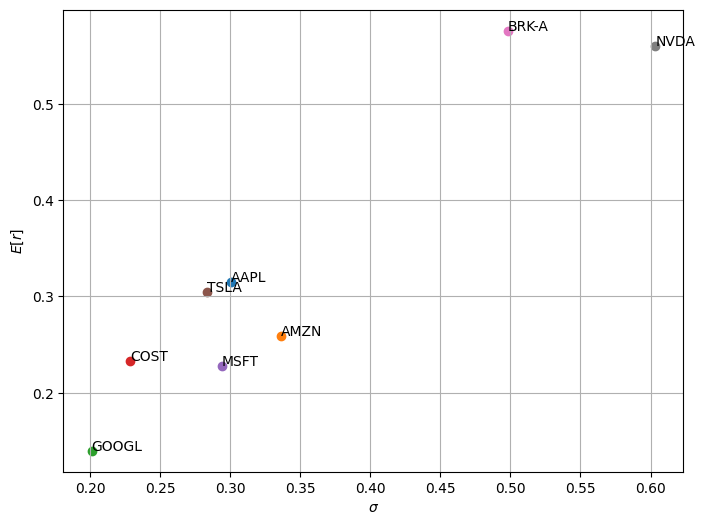

In [94]:
plt.figure(figsize=(8, 6))
for i in range(len(df)):
    flag_df = df.iloc[i]
    name = tickers[i]
    plt.scatter(flag_df["volatilidades"], flag_df["rendimientos"])
    plt.text(flag_df["volatilidades"], flag_df["rendimientos"], name)
plt.grid()
plt.xlabel("$\sigma$")
plt.ylabel("$E[r]$")